#<font color='green' size=5> **–ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤**

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, LogisticRegression
from sklearn.metrics import (mean_absolute_error, root_mean_squared_error, r2_score, roc_auc_score)


import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.float_format', '{:.6f}'.format)


#<font color='green' size=5> **–ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö –∏ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ä–æ–ª–µ–π –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö**

In [10]:
try:
  data = fetch_california_housing(as_frame=True)
  df = data.frame
  target = 'MedHouseVal'
except Exception as e:
  print(e)
  !gdown 1ndW2qOmF_YIgJhJ4ZyrmFwtRkOLGp5zL
  df = pd.read_csv('/content/housing.csv')
  target = 'median_house_value'

In [11]:
# –Ω–∞–∑–≤–∞–Ω–∏—è —Å—Ç–æ–ª–±—Ü–æ–≤ –ø—Ä–∏–≤–µ–¥–µ–º –∫ lowecase
df.columns=[col.lower() for col in df.columns]
target = target.lower()

In [12]:
df.head()

medinc  houseage  averooms  avebedrms  population  aveoccup  latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   longitude  medhouseval  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

In [13]:
df.columns

Index(['medinc', 'houseage', 'averooms', 'avebedrms', 'population', 'aveoccup',
       'latitude', 'longitude', 'medhouseval'],
      dtype='object')

In [14]:
# –∑–∞–¥–∞–¥–∏–º —Ä–æ–ª–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º
ids = ['latitude', 'longitude']
target = 'medhouseval'
features_num = [col for col in df.select_dtypes(include='number').columns if col not in ids + [target, ]]
features_cat = [col for col in df.select_dtypes(exclude='number').columns if col not in ids + [target, ]]
features_num, features_cat

(['medinc', 'houseage', 'averooms', 'avebedrms', 'population', 'aveoccup'], [])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   medinc       20640 non-null  float64
 1   houseage     20640 non-null  float64
 2   averooms     20640 non-null  float64
 3   avebedrms    20640 non-null  float64
 4   population   20640 non-null  float64
 5   aveoccup     20640 non-null  float64
 6   latitude     20640 non-null  float64
 7   longitude    20640 non-null  float64
 8   medhouseval  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [16]:
shape_orig = df.shape[0]

# <font color='green' size=5>**EDA**

##<font color='blue' size=4> –∞–Ω–∞–ª–∏–∑ —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞

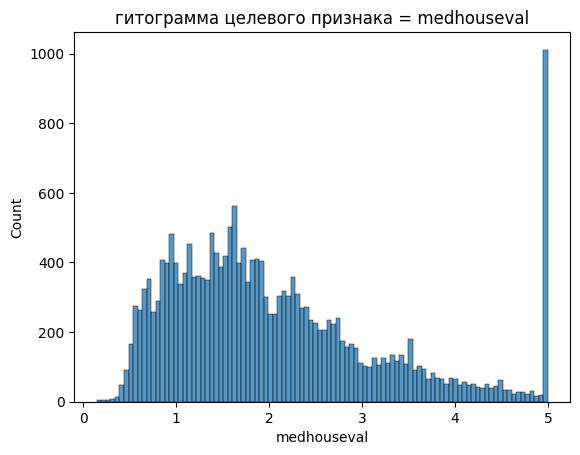

In [10]:
sns.histplot(df[target], bins=100)
plt.title(f'–≥–∏—Ç–æ–≥—Ä–∞–º–º–∞ —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ = {target}')
plt.show()

In [11]:
df[target].describe()

count   20640.000000
mean        2.068558
std         1.153956
min         0.149990
25%         1.196000
50%         1.797000
75%         2.647250
max         5.000010
Name: medhouseval, dtype: float64

In [18]:
# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ —Ç–∞—Ä–≥–µ—Ç–∞, —Å–æ–∑–¥–∞–¥–∏–º –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä: –≤—ã–±—Ä–æ—Å –∏–ª–∏ –Ω–µ—Ç
IQR = df[target].quantile(0.75) - df[target].quantile(0.25)
lower = df[target].quantile(0.25) - 1.5 * IQR
upper = df[target].quantile(0.75) + 1.5 * IQR
df['is_high_price'] = np.where((df[target] >= lower) & (df[target] <= upper), 0, 1)

In [19]:
df.sort_values('is_high_price')

medinc  houseage  averooms  avebedrms  population  aveoccup  latitude  \
13521   5.2072      20.0  6.170213   0.962766       543.0  2.888298     34.24   
13530   5.5136      19.0  6.629921   1.000000      1176.0  3.086614     34.18   
13529   3.6362       6.0  4.871773   1.107573      2943.0  2.532702     34.17   
13528   3.0078      25.0  4.912127   1.047452      1650.0  2.899824     34.17   
13527   1.8750      30.0  5.668950   1.308219      1172.0  2.675799     34.17   
...        ...       ...       ...        ...         ...       ...       ...   
17047   7.4678      15.0  6.594465   1.073406      2009.0  2.417569     37.48   
17045   8.5184      26.0  6.759542   0.967557      1392.0  2.656489     37.48   
17043   6.5475      25.0  6.992374   1.102955      2626.0  2.503337     37.49   
4360    2.8942      31.0  3.914369   1.024673      1059.0  1.537010     34.09   
16011  10.9590      52.0  7.153310   0.979094       791.0  2.756098     37.74   

       longitude  medhouseval  is_high_price  
13521    -117.41      1.64300              0  
13530    -117.30      1.37100              0  
13529    -117.32      1.06500              0  
13528    -117.31      0.87100              0  
13527    -117.30      0.89700              0  
...          ...          ...            ...  
17047    -122.29      5.00001              1  
17045    -122.27      5.00001              1  
17043    -122.28      5.00001              1  
4360     -118.37      5.00001              1  
16011    -122.46      5.00001              1  

[20640 rows x 10 columns]

In [14]:
df['is_high_price'].sum()

np.int64(1071)

In [15]:
print(f"–≤—Å–µ–≥–æ {df['is_high_price'].sum()} –≤—ã–±—Ä–æ—Å–æ–≤, —á—Ç–æ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç {round(df['is_high_price'].sum()/shape_orig*100, 2)}%")

–≤—Å–µ–≥–æ 1071 –≤—ã–±—Ä–æ—Å–æ–≤, —á—Ç–æ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 5.19%


In [17]:
bin_target = 'is_high_price'

In [17]:
# df = df[(df[target] >= lower) & (df[target] <= upper)]

##<font color='blue' size=4> –∞–Ω–∞–ª–∏–∑ –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö

In [18]:
features_num

['medinc', 'houseage', 'averooms', 'avebedrms', 'population', 'aveoccup']

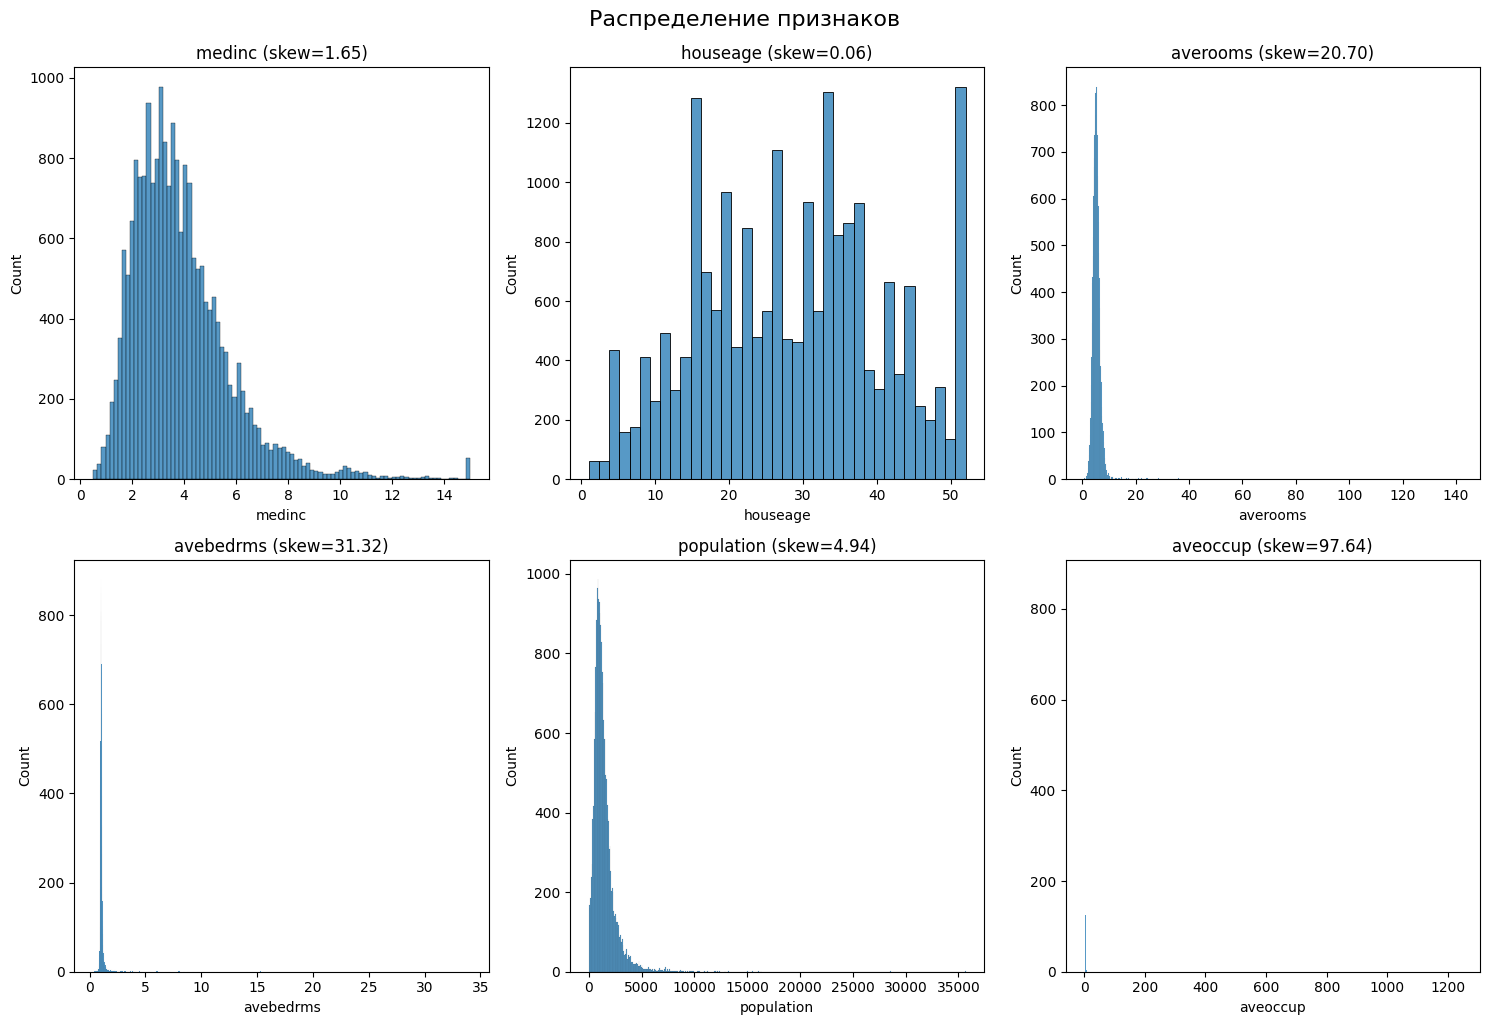

In [19]:
# –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
plt.figure(figsize=(15, 10))
n_cols = len(features_num) // 3
n_rows = 3 if len(features_num) % 3 == 0 else 4
for i, col in enumerate(features_num):
    plt.subplot(n_cols, n_rows, i + 1)
    sns.histplot(df[col], kde=False)
    plt.title(f'{col} (skew={df[col].skew():.2f})')
plt.tight_layout()
plt.suptitle("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤", fontsize=16, y=1.02)
plt.show()


In [20]:
# —Å–æ–∑–¥–∞–¥–∏–º –Ω–æ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é
df['avebedrms_averooms'] = df['avebedrms'] /df['averooms']
features_num.append('avebedrms_averooms')

In [21]:
print("–û–ø–∏—Å–∞—Ç–µ–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞:")
display(df[features_num].describe().T)


–û–ø–∏—Å–∞—Ç–µ–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞:


count        mean         std      min        25%  \
medinc             20640.000000    3.870671    1.899822 0.499900   2.563400   
houseage           20640.000000   28.639486   12.585558 1.000000  18.000000   
averooms           20640.000000    5.429000    2.474173 0.846154   4.440716   
avebedrms          20640.000000    1.096675    0.473911 0.333333   1.006079   
population         20640.000000 1425.476744 1132.462122 3.000000 787.000000   
aveoccup           20640.000000    3.070655   10.386050 0.692308   2.429741   
avebedrms_averooms 20640.000000    0.213075    0.058023 0.100000   0.175426   

                           50%         75%          max  
medinc                3.534800    4.743250    15.000100  
houseage             29.000000   37.000000    52.000000  
averooms              5.229129    6.052381   141.909091  
avebedrms             1.048780    1.099526    34.066667  
population         1166.000000 1725.000000 35682.000000  
aveoccup              2.818116    3.282261  1243.333333  
avebedrms_averooms    0.203181    0.239834     1.000000

# <font color='green' size=5>**–†–∞–∑–¥–µ–ª–∏–º –≤—ã–±–æ—Ä–∫—É –Ω–∞ —Ç—Ä–µ–π–Ω –∏ —Ç–µ—Å—Ç**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df[features_num],
                                                    df[[target, bin_target]],
                                                    # stratify = df[bin_target],
                                                    test_size=0.2, random_state=42)


In [22]:
y_train[bin_target].mean(), y_test[bin_target].mean()

(np.float64(0.052749515503875966), np.float64(0.04844961240310078))

In [23]:
y_train_bin, y_test_bin = y_train[bin_target], y_test[bin_target]

In [30]:
y_train_bin.mean(), y_test_bin.mean()

(np.float64(0.052749515503875966), np.float64(0.04844961240310078))

In [24]:
y_train, y_test = y_train[target], y_test[target]

# <font color='green' size=5>**–ú–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ**

##<font size=4>**–¢–æ—á–Ω–æ –ª–∏ –Ω—É–∂–Ω–∞ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è?**

In [25]:
# –õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è –±–µ–∑ —Å–∫–µ–π–ª–µ—Ä–∞
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred_orig = lr.predict(X_test)
mae_orig = mean_absolute_error(y_test, y_pred_orig)
rmse_orig = root_mean_squared_error(y_test, y_pred_orig)

res_without_scaler = {
    "Scaler": "None",
    "MAE": mae_orig,
    "RMSE":rmse_orig
}
res_without_scaler


{'Scaler': 'None', 'MAE': 0.5695346842257899, 'RMSE': 0.784416322678881}

<font color='red'>StandardScaler (–∫–∞–∫ –∏ –ª—é–±–æ–π –ø—Ä–µ–ø—Ä–æ—Ü–µ—Å—Å–∏–Ω–≥, –∑–∞–≤–∏—Å—è—â–∏–π –æ—Ç –¥–∞–Ω–Ω—ã—Ö) –¥–æ–ª–∂–µ–Ω –±—ã—Ç—å –æ–±—É—á–µ–Ω —Ç–æ–ª—å–∫–æ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ, –∏–Ω–∞—á–µ –º–æ–∂–Ω–æ –ø–æ–ª—É—á–∏—Ç—å —É—Ç–µ—á–∫—É –¥–∞–Ω–Ω—ã—Ö (data leakage).

–ü–æ—á–µ–º—É —ç—Ç–æ –≤–∞–∂–Ω–æ?

- —ç—Ç–æ –∏—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω–æ —É–ª—É—á—à–∞–µ—Ç —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –∏ –¥–µ–ª–∞–µ—Ç –º–æ–¥–µ–ª—å –Ω–µ—Ä–µ–∞–ª–∏—Å—Ç–∏—á–Ω–æ –æ–ø—Ç–∏–º–∏—Å—Ç–∏—á–Ω–æ–π;

- –ø—Ä–∏ —Ä–∞–∑–≤—ë—Ä—Ç—ã–≤–∞–Ω–∏–∏ –≤ –ø—Ä–æ–¥–µ —Å–∫–µ–π–ª–µ—Ä –Ω–µ –±—É–¥–µ—Ç –∑–Ω–∞—Ç—å —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –Ω–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö ‚Äî –∏ –≤—Å—ë –Ω–∞—á–Ω—ë—Ç —Ä–∞–±–æ—Ç–∞—Ç—å –∏–Ω–∞—á–µ.

In [26]:
# –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# –õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è —Å–æ StandardScaler

lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_scaled)
rmse = root_mean_squared_error(y_test, y_pred_scaled)

res_wit_scaler = {
    "Scaler": "StandardScaler",
    "MAE": mae,
    "RMSE":rmse
}
res_wit_scaler



{'Scaler': 'StandardScaler',
 'MAE': 0.5695346842257903,
 'RMSE': 0.7844163226788807}

y = w_0 + w_1*x_1 + w_2*x_2+...w_n*x_n

In [29]:
X_train

medinc  houseage  averooms  avebedrms  population  aveoccup  \
14196  3.2596      33.0  5.017657   1.006421      2300.0  3.691814   
8267   3.8125      49.0  4.473545   1.041005      1314.0  1.738095   
17445  4.1563       4.0  5.645833   0.985119       915.0  2.723214   
14265  1.9425      36.0  4.002817   1.033803      1418.0  3.994366   
2271   3.5542      43.0  6.268421   1.134211       874.0  2.300000   
...       ...       ...       ...        ...         ...       ...   
11284  6.3700      35.0  6.129032   0.926267       658.0  3.032258   
11964  3.0500      33.0  6.868597   1.269488      1753.0  3.904232   
5390   2.9344      36.0  3.986717   1.079696      1756.0  3.332068   
860    5.7192      15.0  6.395349   1.067979      1777.0  3.178891   
15795  2.5755      52.0  3.402576   1.058776      2619.0  2.108696   

       avebedrms_averooms  
14196            0.200576  
8267             0.232703  
17445            0.174486  
14265            0.258269  
2271             0.180940  
...                   ...  
11284            0.151128  
11964            0.184825  
5390             0.270823  
860              0.166993  
15795            0.311169  

[16512 rows x 7 columns]

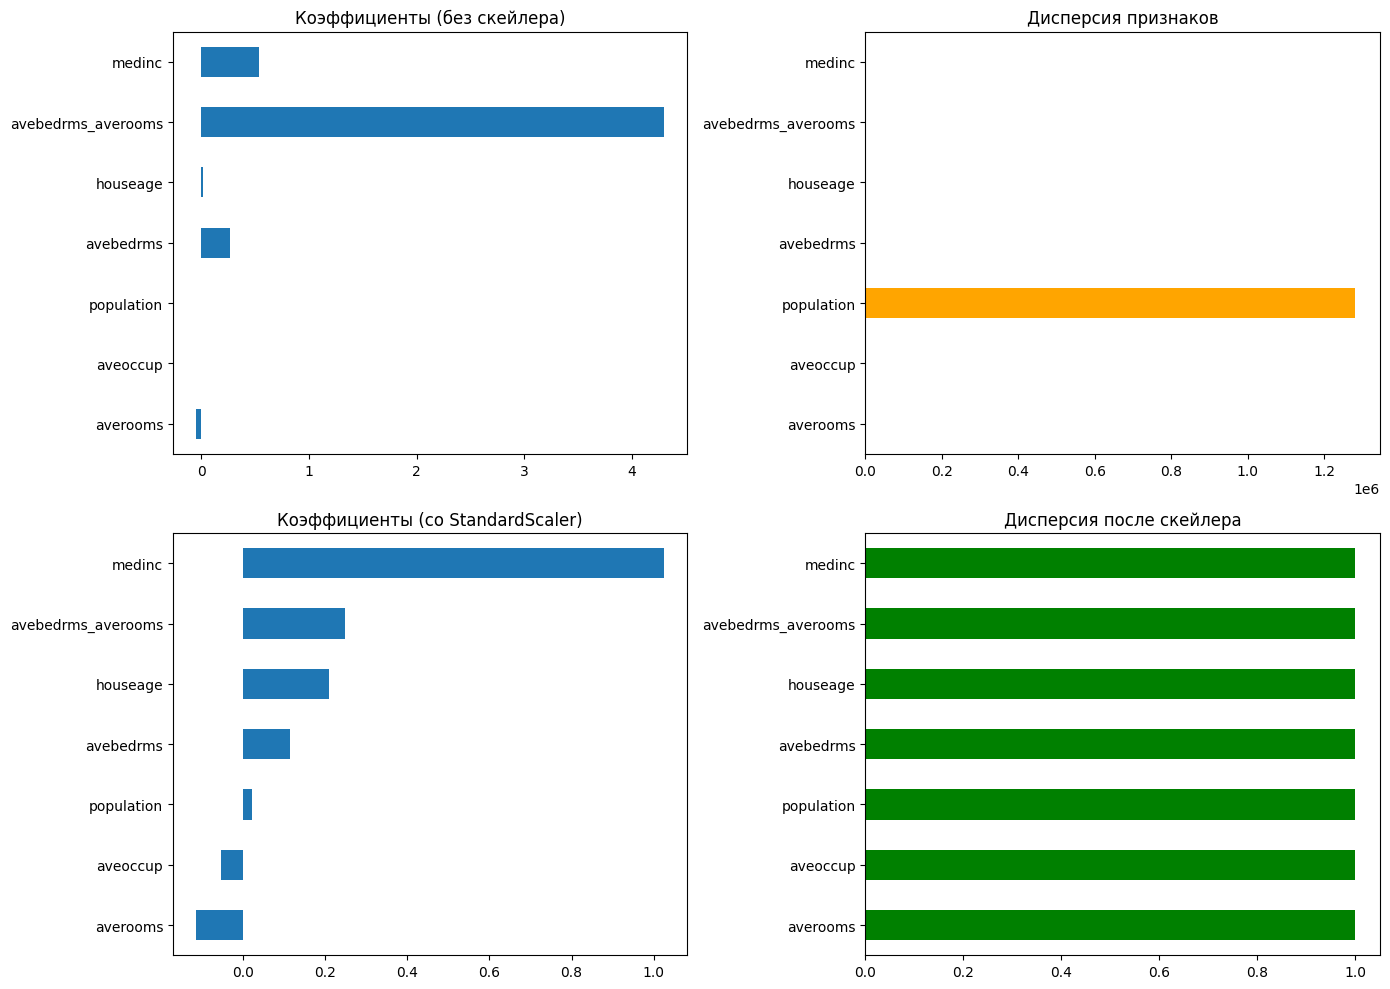

–ë–µ–∑ —Å–∫–µ–π–ª–µ—Ä–∞  –°–æ —Å–∫–µ–π–ª–µ—Ä–æ–º
averooms                0.047556      0.113530
aveoccup                0.004659      0.053947
population              0.000019      0.022010
avebedrms               0.264736      0.114684
houseage                0.016668      0.210053
avebedrms_averooms      4.300926      0.249426
medinc                  0.538518      1.025466

In [28]:
# –°–æ—Ö—Ä–∞–Ω–∏–º –∫–æ—ç—Ñ—ã
coef_raw = pd.Series(lr.coef_, index=features_num)
coef_scaled = pd.Series(lr_scaled.coef_, index=features_num)

# –ü–æ—Å—á–∏—Ç–∞–µ–º –¥–∏—Å–ø–µ—Ä—Å–∏–∏
feature_variances = df[features_num].var()

# –ü–æ–ª—É—á–∏–º —Å–æ—Ä—Ç–∏—Ä–æ–≤–∫—É –ø–æ –≤–∞–∂–Ω–æ—Å—Ç–∏ (–ø–æ –º–æ–¥—É–ª—é –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ –ø–æ—Å–ª–µ —Å–∫–µ–π–ª–µ—Ä–∞)
sorted_features = coef_scaled.sort_values(ascending=True).index

# –û—Ç—Å–æ—Ä—Ç–∏—Ä—É–µ–º –≤—Å—ë –ø–æ —ç—Ç–æ–º—É –ø–æ—Ä—è–¥–∫—É
coef_raw = coef_raw.loc[sorted_features]
coef_scaled = coef_scaled.loc[sorted_features]
feature_variances = feature_variances.loc[sorted_features]

# –ü–æ—Å—Ç—Ä–æ–∏–º —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –±–µ–∑ —Å–∫–µ–π–ª–µ—Ä–∞
coef_raw.plot(kind='barh', ax=axes[0, 0], title='–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã (–±–µ–∑ —Å–∫–µ–π–ª–µ—Ä–∞)')

# –î–∏—Å–ø–µ—Ä—Å–∏—è –±–µ–∑ —Å–∫–µ–π–ª–µ—Ä–∞
feature_variances.plot(kind='barh', ax=axes[0, 1], color='orange', title='–î–∏—Å–ø–µ—Ä—Å–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤')

# –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã —Å–æ —Å–∫–µ–π–ª–µ—Ä–æ–º
coef_scaled.plot(kind='barh', ax=axes[1, 0], title='–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã (—Å–æ StandardScaler)')

# –î–∏—Å–ø–µ—Ä—Å–∏—è –ø–æ—Å–ª–µ —Å–∫–µ–π–ª–µ—Ä–∞ (‚âà1)
pd.Series(1.0, index=sorted_features).plot(kind='barh', ax=axes[1, 1], color='green', title='–î–∏—Å–ø–µ—Ä—Å–∏—è –ø–æ—Å–ª–µ —Å–∫–µ–π–ª–µ—Ä–∞')

plt.tight_layout()
plt.show()

# –°—Ä–∞–≤–Ω–∏–º –ø–æ –º–æ–¥—É–ª—é, –∫—Ç–æ –≤–∞–∂–Ω–µ–µ
importance_comparison = pd.DataFrame({
    '–ë–µ–∑ —Å–∫–µ–π–ª–µ—Ä–∞': coef_raw.abs(),
    '–°–æ —Å–∫–µ–π–ª–µ—Ä–æ–º': coef_scaled.abs()
})

importance_comparison.head(10)


<font color='green' size=4>StandardScaler –Ω—É–∂–µ–Ω –¥–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏–º–µ–ª–∏ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–π –º–∞—Å—à—Ç–∞–±, —á—Ç–æ–±—ã –º–æ–¥–µ–ª—å –º–æ–≥–ª–∞ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä–æ–≤–∞—Ç—å –∑–Ω–∞—á–∏–º–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.

In [30]:
# –õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è –±–µ–∑ —Å–∫–µ–π–ª–µ—Ä–∞, –æ–±—É—á–µ–Ω–∏–µ - –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫
lr = SGDRegressor(max_iter=20000, tol=1e-4, random_state=42, alpha=0, l1_ratio=0)

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

y_pred_orig = lr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_orig)
rmse = root_mean_squared_error(y_test, y_pred_orig)

res_without_scaler = {
    "Scaler": "None",
    "MAE": mae,
    "RMSE":rmse
}
res_without_scaler


{'Scaler': 'None', 'MAE': 611508181356936.5, 'RMSE': 777251035409632.4}

In [31]:
# –õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è —Å–æ StandardScaler, –æ–±—É—á–µ–Ω–∏–µ - –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫

lr_scaled = SGDRegressor(max_iter=20000, tol=1e-4, random_state=42, alpha=0, l1_ratio=0)
lr_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_scaled)
rmse = root_mean_squared_error(y_test, y_pred_scaled)

res_with_scaler = {
    "Scaler": "StandardScaler",
    "MAE": mae,
    "RMSE":rmse
}
res_with_scaler



{'Scaler': 'StandardScaler',
 'MAE': 0.5689010347992915,
 'RMSE': 0.7806005739356693}

<font color='green' size=4>StandardScaler –Ω—É–∂–µ–Ω –¥–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã —Å—Ö–æ–¥–∏–ª—Å—è –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã–π —Å–ø—É—Å–∫

In [32]:
# –ú–æ–¥–µ–ª—å –±–µ–∑ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏—è
lasso_raw = Lasso(alpha=0.001)
lasso_raw.fit(X_train, y_train)
coef_lasso_raw = pd.Series(lasso_raw.coef_, index=features_num)
coef_lasso_raw.sort_values(ascending=False)

avebedrms_averooms    3.231681
medinc                0.536193
avebedrms             0.433899
houseage              0.016726
population            0.000020
aveoccup             -0.004630
averooms             -0.083638
dtype: float64

In [33]:
#–ú–æ–¥–µ–ª—å —Å –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ–º
lasso_scaled = Lasso(alpha=0.001)
lasso_scaled.fit(X_train_scaled, y_train)
coef_lasso_scaled = pd.Series(lasso_scaled.coef_, index=features_num)
coef_lasso_scaled.sort_values(ascending=False)

medinc                1.017733
avebedrms_averooms    0.259324
houseage              0.208864
avebedrms             0.085944
population            0.020537
aveoccup             -0.052708
averooms             -0.081976
dtype: float64

<font color='green' size=4>
- –†–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è –±–µ–∑ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏–∏ —Ä–∞–±–æ—Ç–∞–µ—Ç "–Ω–µ—á–µ—Å—Ç–Ω–æ" ‚Äî –≤–∞–∂–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –º–æ–≥—É—Ç –±—ã—Ç—å –≤—ã–∫–∏–Ω—É—Ç—ã, –µ—Å–ª–∏ —É –Ω–∏—Ö –ø—Ä–æ—Å—Ç–æ –º–∞–ª–µ–Ω—å–∫–∏–π –º–∞—Å—à—Ç–∞–±.

##<font size=4>**–ö–∞–∫–æ–π –º–µ—Ç–æ–¥ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ –≤—ã–±—Ä–∞—Ç—å?**

### 1. StandardScaler

**–ß—Ç–æ –¥–µ–ª–∞–µ—Ç:**  
–ú–∞—Å—à—Ç–∞–±–∏—Ä—É–µ—Ç –¥–∞–Ω–Ω—ã–µ —Ç–∞–∫, —á—Ç–æ–±—ã **—Å—Ä–µ–¥–Ω–µ–µ = 0**, –∞ **—Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ = 1**.

**–§–æ—Ä–º—É–ª–∞:**  
$
z = \frac{x - \mu}{\sigma}
$
–≥–¥–µ $ \mu $ ‚Äî —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∞,  
–∞ $ \sigma $ ‚Äî —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ.

**–ö–æ–≥–¥–∞ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å:**
- –ö–æ–≥–¥–∞ –¥–∞–Ω–Ω—ã–µ –∏–º–µ—é—Ç —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ, –±–ª–∏–∑–∫–æ–µ –∫ **–Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É (Gaussian)**.
- –ö–æ–≥–¥–∞ –≤–∞–∂–Ω—ã –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è –æ—Ç —Å—Ä–µ–¥–Ω–µ–≥–æ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –¥–ª—è –ª–∏–Ω–µ–π–Ω–æ–π –∏–ª–∏ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏, PCA).

**–£—è–∑–≤–∏–º –∫ –≤—ã–±—Ä–æ—Å–∞–º:** ‚úÖ –î–∞

---

### 2. RobustScaler

**–ß—Ç–æ –¥–µ–ª–∞–µ—Ç:**  
–ò—Å–ø–æ–ª—å–∑—É–µ—Ç **–º–µ–¥–∏–∞–Ω—É** –∏ **–∏–Ω—Ç–µ—Ä–∫–≤–∞—Ä—Ç–∏–ª—å–Ω—ã–π —Ä–∞–∑–º–∞—Ö (IQR)** –≤–º–µ—Å—Ç–æ —Å—Ä–µ–¥–Ω–µ–≥–æ –∏ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–≥–æ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è.

**–§–æ—Ä–º—É–ª–∞:**  
$
x_{\text{scaled}} = \frac{x - \text{median}}{\text{IQR}}
$
–≥–¥–µ  
$
\text{IQR} = Q3 - Q1
$

**–ö–æ–≥–¥–∞ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å:**
- –ö–æ–≥–¥–∞ –≤ –¥–∞–Ω–Ω—ã—Ö –µ—Å—Ç—å **–≤—ã–±—Ä–æ—Å—ã**.
- –ö–æ–≥–¥–∞ –¥–∞–Ω–Ω—ã–µ –∞—Å–∏–º–º–µ—Ç—Ä–∏—á–Ω—ã.

**–£—è–∑–≤–∏–º –∫ –≤—ã–±—Ä–æ—Å–∞–º:** ‚ùå –ù–µ—Ç

---

### 3. MinMaxScaler

**–ß—Ç–æ –¥–µ–ª–∞–µ—Ç:**  
–ú–∞—Å—à—Ç–∞–±–∏—Ä—É–µ—Ç –¥–∞–Ω–Ω—ã–µ –≤ –¥–∏–∞–ø–∞–∑–æ–Ω –æ—Ç 0 –¥–æ 1.

**–§–æ—Ä–º—É–ª–∞:**  
$
x_{\text{scaled}} = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
$

**–ö–æ–≥–¥–∞ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å:**
- –ö–æ–≥–¥–∞ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å –≤ **–æ–¥–Ω–æ–º –º–∞—Å—à—Ç–∞–±–µ** (–Ω–∞–ø—Ä–∏–º–µ—Ä, –¥–ª—è k-NN, –Ω–µ–π—Ä–æ—Å–µ—Ç–µ–π).
- –ö–æ–≥–¥–∞ –Ω–µ—Ç —Å–∏–ª—å–Ω—ã—Ö –≤—ã–±—Ä–æ—Å–æ–≤.

**–£—è–∑–≤–∏–º –∫ –≤—ã–±—Ä–æ—Å–∞–º:** ‚úÖ –î–∞

---

### üîç –°—Ä–∞–≤–Ω–µ–Ω–∏–µ

| –•–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∞       | StandardScaler         | RobustScaler           | MinMaxScaler         |
|----------------------|------------------------|-------------------------|----------------------|
| –¶–µ–Ω—Ç—Ä–∏—Ä–æ–≤–∞–Ω–∏–µ        | –ü–æ —Å—Ä–µ–¥–Ω–µ–º—É            | –ü–æ –º–µ–¥–∏–∞–Ω–µ              | –ù–µ—Ç                  |
| –ú–∞—Å—à—Ç–∞–±              | –ü–æ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–º—É –æ—Ç–∫–ª.  | –ü–æ –∏–Ω—Ç–µ—Ä–∫–≤–∞—Ä—Ç–∏–ª—å–Ω–æ–º—É    | –í –¥–∏–∞–ø–∞–∑–æ–Ω \([0, 1]\) |
| –£—Å—Ç–æ–π—á–∏–≤ –∫ –≤—ã–±—Ä–æ—Å–∞–º  | ‚ùå –ù–µ—Ç                  | ‚úÖ –î–∞                   | ‚ùå –ù–µ—Ç               |
| –ü–æ–¥—Ö–æ–¥–∏—Ç –¥–ª—è         | –ù–æ—Ä–º–∞–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö      | –î–∞–Ω–Ω—ã—Ö —Å –≤—ã–±—Ä–æ—Å–∞–º–∏      | –î–∞–Ω–Ω—ã—Ö –±–µ–∑ –≤—ã–±—Ä–æ—Å–æ–≤  |
| –ß–∞—Å—Ç–æ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –≤ | PCA, –ª–∏–Ω. –º–æ–¥–µ–ª–∏       | –†–æ–±–∞—Å—Ç–Ω—ã–µ –º–æ–¥–µ–ª–∏        | k-NN, –Ω–µ–π—Ä–æ—Å–µ—Ç–∏      |


In [34]:
scalers = {
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler(),
    "MinMaxScaler": MinMaxScaler()
}

In [35]:
results = []

for scaler_name, scaler in scalers.items():
    # –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = SGDRegressor(max_iter=20000, tol=1e-4, random_state=42, alpha=0, l1_ratio=0)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)

    results.append({
        "Scaler": scaler_name,
        "MAE": mae,
        "RMSE":rmse
    })

In [36]:
results

[{'Scaler': 'StandardScaler',
  'MAE': 0.5689010347992915,
  'RMSE': 0.7806005739356693},
 {'Scaler': 'RobustScaler',
  'MAE': 61716652533.44634,
  'RMSE': 179330518762.51175},
 {'Scaler': 'MinMaxScaler',
  'MAE': 0.5764728048359544,
  'RMSE': 0.7869006112689975}]

In [37]:
results_df = pd.DataFrame(results).sort_values(by=['MAE'], ascending=[False])
print("\n –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π:")
display(results_df)


 –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π:


Scaler                MAE                RMSE
1    RobustScaler 61716652533.446342 179330518762.511749
2    MinMaxScaler           0.576473            0.786901
0  StandardScaler           0.568901            0.780601

##<font size=4>**–£–ª—É—á—à–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏**

1) –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è: 1- –≤—ã—Å–æ–∫–∞—è —Å—Ç–æ–∏–º–æ—Å—Ç—å, 0 - –Ω–∏–∑–∫–∞—è —Å—Ç–æ–∏–º–æ—Å—Ç—å  
2) —Ä–µ–≥—Ä–µ—Å—Å–∏—è –æ—Ç–¥–µ–ª—å–Ω–æ –¥–ª—è –Ω–∏–∑–∫–æ–π —Å—Ç–æ–∏–º–æ—Å—Ç—å - regr_1.  
3) —Ä–µ–≥—Ä–µ—Å—Å–∏—è –¥–ª—è –≤—ã—Å–æ–∫–æ–π —Å—Ç–æ–∏–º–æ—Å—Ç–∏ - regr_2.  
4) —Ñ–∏–Ω–∞–ª—å–Ω—ã–π –ø—Ä–æ–≥–Ω–æ–∑ = –µ—Å–ª–∏ –ø—Ä–æ–≥–Ω–æ–∑ 1 –º–æ–¥–µ–ª–∏ (–≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å 1) > treshold  —Ç–æ regr_2 –∏–Ω–∞—á–µ regr_1

In [38]:
# –í—ã–±–∏—Ä–∞–µ–º –∏–Ω–¥–µ–∫—Å—ã, –≥–¥–µ bin_target == 0
mask_train_low = y_train_bin == 0

X_train_low = X_train.loc[mask_train_low]
y_train_low = y_train.loc[mask_train_low]


mask_test_low = y_test_bin == 0

X_test_low = X_test.loc[mask_test_low]
y_test_low = y_test.loc[mask_test_low]


In [39]:
# –í—ã–±–∏—Ä–∞–µ–º –∏–Ω–¥–µ–∫—Å—ã, –≥–¥–µ bin_target == 1
mask_train_high = y_train_bin == 1

X_train_high = X_train.loc[mask_train_high]
y_train_high = y_train.loc[mask_train_high]


mask_test_high = y_test_bin == 1

X_test_high = X_test.loc[mask_test_high]
y_test_high = y_test.loc[mask_test_high]


In [55]:
clf = LogisticRegression(penalty='l1', C = 1, solver='liblinear', random_state=42)
clf.fit(X_train_scaled, y_train_bin)

y_pred_train = clf.predict_proba(X_train_scaled)[:,1]
y_pred_test = clf.predict_proba(X_test_scaled)[:,1]
y_pred_test

array([0.00155406, 0.00511671, 0.10799238, ..., 0.57103372, 0.00551991,
       0.00773981])

In [56]:
roc_auc = roc_auc_score(y_test_bin, y_pred_test)
print(f"ROC AUC TEST: {roc_auc_score(y_test_bin, y_pred_test):.4f} \nROC AUC TRAIN: {roc_auc_score(y_train_bin, y_pred_train):.4f}")

ROC AUC TEST: 0.8922 
ROC AUC TRAIN: 0.9181


In [57]:

# === –†–µ–≥—Ä–µ—Å—Å–∏—è: –æ–±—ã—á–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è (is_high_price == 0) ===

scaler_low = StandardScaler()
X_train_low_scaled = scaler_low.fit_transform(X_train_low)
X_test_low_scaled = scaler_low.transform(X_test_low)

reg_low = Lasso(alpha=0.02)
reg_low.fit(X_train_low_scaled, y_train_low)
y_pred_low = reg_low.predict(X_test_low_scaled)

print("\n=== Regression for Normal Prices ===")
print("RMSE:", root_mean_squared_error(y_test_low, y_pred_low))



=== Regression for Normal Prices ===
MSE: 0.6758597317924367


In [58]:
# === –†–µ–≥—Ä–µ—Å—Å–∏—è –∏–ª–∏ —Å—Ä–µ–¥–Ω–µ–µ: –≤—ã–±—Ä–æ—Å—ã (is_high_price == 1) ===
N = 300
if len(X_train_high) > N:

    scaler_high = StandardScaler()
    X_train_high_scaled = scaler_high.fit_transform(X_train_high)
    X_test_high_scaled = scaler_high.transform(X_test_high)

    reg_high = Lasso(alpha=10)
    reg_high.fit(X_train_high_scaled, y_train_high)
    y_pred_high = reg_high.predict(X_test_high_scaled)

    print("\n=== Regression (Ridge) for High Prices ===")
    print("RMSE:", root_mean_squared_error(y_test_high, y_pred_high))
else:
    mean_high = y_train_high.mean()
    print(f"\n=== High Prices: too few rows ({len(X_train_high)}), using mean prediction ===")
    print(f"Mean value prediction: {mean_high:.2f}")



=== Regression (Ridge) for High Prices ===
RMSE: 0.03529877152051453


<Axes: ylabel='Count'>

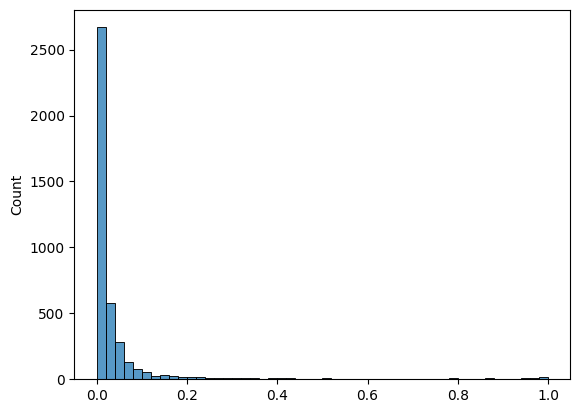

In [59]:
sns.histplot(clf.predict_proba(X_test_scaled)[:,1], bins=50)

In [60]:
proba_high = clf.predict_proba(X_test_scaled)[:, 1]

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –æ–±–µ–∏—Ö –º–æ–¥–µ–ª–µ–π
pred_low = reg_low.predict(scaler_low.transform(X_test))
pred_high = reg_high.predict(scaler_high.transform(X_test))

# –í—ã–±–∏—Ä–∞–µ–º, –≥–¥–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å < 0.5, —Ç–∞–º pred_low, –∏–Ω–∞—á–µ pred_high
y_pred_test = np.where(proba_high < 0.5, pred_low, pred_high)


In [61]:
print("MAE:", mean_absolute_error(y_test, y_pred_test))
print("RMSE:", root_mean_squared_error(y_test, y_pred_test))

MAE: 0.5529335674959623
RMSE: 0.7793501154608125
